# Preprocessing
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---
## Overview
This notebook preprocesses and splits the data into the necessary training, testing and development splits we used for our studies. It accomplishes the following preprocessing steps:
1. Only the majority emotion felt will remain per painting.
2. Only utterances associated with the majorit emotion per painting will remain.
3. Paintings with uniform distribution of emotions should be removed.

It also performs the following actions upon data splitting:
1. Seeds the splits in a 70-10-20; training-dev-testing split schema.
2. Oversamples underrepresented emotions and undersamples overrepresented emotions.
---
## Set-Up
### Necessary Imports

In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

### Settings

In [2]:
# Turn this off
%pprint
pd.set_option('display.max_columns', None)

Pretty printing has been turned OFF


### Globals

In [3]:
DATA = "../data/art_full.csv"
SEED = 42

---
## Preprocessing

In [4]:
art_df = pd.read_csv(DATA, index_col=False)
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454684 entries, 0 to 454683
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   art_style   454684 non-null  object 
 1   painting    454684 non-null  object 
 2   emotion     454684 non-null  object 
 3   utterance   454684 non-null  object 
 4   repetition  454684 non-null  int64  
 5   artist      454684 non-null  object 
 6   year        268063 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 24.3+ MB


In [5]:
# Get the majority emotion per painting and drop uniformly distributed paintings
# TODO: Can I get some confirmation that this is correct?
max_emo_df = art_df.groupby(["painting"], as_index=False).value_counts(subset=["emotion"], sort=True).drop_duplicates(["painting", "count"], keep=False).drop_duplicates(["painting"], keep="first")
max_emo_df

,painting,emotion,count
0,a.y.-jackson_algoma-in-november-1935,fear,4
4,a.y.-jackson_barns-1926,amusement,1
7,a.y.-jackson_early-spring-quebec-1923,sadness,1
8,a.y.-jackson_entrance-to-halifax-harbour-1919,contentment,4
10,a.y.-jackson_first-snow-algoma-country-1920,fear,3
...,...,...,...
269272,zinaida-serebriakova_woman-in-blue-1934,contentment,4
269276,zinaida-serebriakova_work-from-collioure-1930,contentment,1
269277,zinaida-serebriakova_yevgeny-lanceray-in-a-sha...,amusement,3
269280,zinaida-serebriakova_young-breton-1934,contentment,3


In [6]:
# How many unique rows we should have after merging
sum(max_emo_df["count"])

196844

In [7]:
# Approx 9k paintings have a uniform distribution of emotions
len(art_df["painting"].unique())

80031

In [8]:
# Filter by the painting and emotion column
new_df = pd.merge(left=art_df, right=max_emo_df, how="inner", on=["painting", "emotion"])
new_df.head()

,art_style,painting,emotion,utterance,repetition,artist,year,count
0,Abstract_Expressionism,aaron-siskind_per-400-1983,amusement,it looks like there could be a bird walking up...,5,aaron-siskind,1983.0,1
1,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,the cheetah print is very mesmerizing and plea...,5,abidin-dino,NaN,2
2,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,the painting is playful despite the stark colo...,5,abidin-dino,NaN,2
3,Abstract_Expressionism,alexander-calder_the-dog,amusement,not sure what this represents so its fun to tr...,7,alexander-calder,NaN,4
4,Abstract_Expressionism,alexander-calder_the-dog,amusement,the sculpture looks to be seals with legs and ...,7,alexander-calder,NaN,4


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196844 entries, 0 to 196843
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   art_style   196844 non-null  object 
 1   painting    196844 non-null  object 
 2   emotion     196844 non-null  object 
 3   utterance   196844 non-null  object 
 4   repetition  196844 non-null  int64  
 5   artist      196844 non-null  object 
 6   year        114631 non-null  float64
 7   count       196844 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 12.0+ MB


---
## Split Creation
We need to make sure splits contain all emotions

In [10]:
train, test = train_test_split(new_df, train_size=0.7, random_state=SEED, shuffle=True)

# Valid vs. Test
valid, test = train_test_split(test, train_size=0.1, random_state=SEED, shuffle=True)

# Sanity check
print(len(train))
print(len(test))
print(len(valid))

# Both splits have all emotions
print(len(train["emotion"].unique()))
print(len(test["emotion"].unique()))
print(len(valid["emotion"].unique()))

137790
53149
5905
9
9
9


In [11]:
train.head(10)

,art_style,painting,emotion,utterance,repetition,artist,year,count
104341,Naive_Art_Primitivism,miriam-schapiro_goncharova-1992,excitement,"the orange background color, and th red on her...",5,miriam-schapiro,1992.0,3
85453,Impressionism,theodor-pallady_debarcader-pe-sena-dinspre-bel...,contentment,the little building has very colorful paint on...,5,theodor-pallady,NaN,3
133149,Post_Impressionism,albert-marquet_notre-dame-in-winter-1902,something else,ominous landscape and structure setting. hard...,6,albert-marquet,1902.0,3
159111,Realism,vincent-van-gogh_peasant-woman-lifting-potatoe...,sadness,this painting gives off old history book vibes...,5,vincent-van-gogh,1885.0,3
151669,Realism,volodymyr-orlovsky_edge-of-a-wood,contentment,the cows seek shade under the large tree.,5,volodymyr-orlovsky,NaN,4
151977,Realism,winslow-homer_on-the-trail,contentment,the colors of autumn leaves accompany the man ...,5,winslow-homer,NaN,2
127724,Post_Impressionism,pyotr-konchalovsky_veranda-essentuki-1948,contentment,a chair on the sunporch as the shine shines th...,5,pyotr-konchalovsky,1948.0,5
103956,Naive_Art_Primitivism,grã©goire-michonze_scene-de-village,disgust,naked women getting kissed and groped by men.,5,grã©goire-michonze,NaN,3
25564,Baroque,rembrandt_tobit-and-anna-1659,sadness,the man is breathing his last breathes as he l...,5,rembrandt,1659.0,4
37800,Early_Renaissance,bartolome-bermejo_piet-of-canon-luis-despl-1490,sadness,there is real sorrow in the woman's face holdi...,6,bartolome-bermejo,1490.0,5


---
## Training Set Sampling

<Axes: xlabel='emotion'>

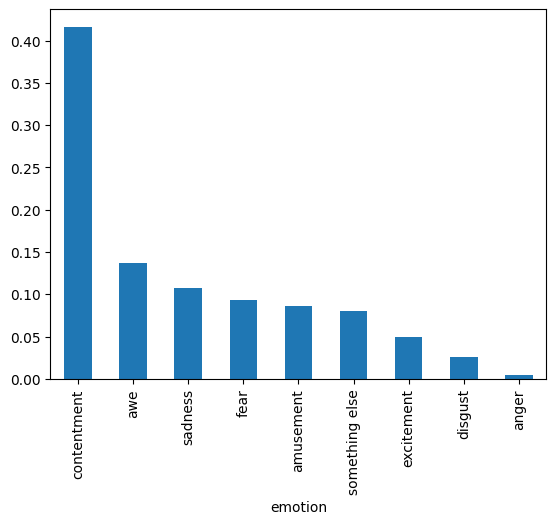

In [13]:
# Distribution of emotions over the training set
train["emotion"].value_counts(normalize=True).plot(kind="bar")

### Possible Solutions
- Randomly undersample the `contentment` class
- Randomly oversample the `something else`, `excitement`, `disgust` and `anger` classes
    - Apply some version of SMOTE on these classes to more advanced classifiers or to their word vector representations
- Potentially remove the `something else` category

In [14]:
# Merge the DataFrames with a split column
train["split"] = "TRAIN"
test["split"] = "TEST"
valid["split"] = "VALID"

final_df = pd.concat([train, test, valid])

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196844 entries, 104341 to 3332
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   art_style   196844 non-null  object 
 1   painting    196844 non-null  object 
 2   emotion     196844 non-null  object 
 3   utterance   196844 non-null  object 
 4   repetition  196844 non-null  int64  
 5   artist      196844 non-null  object 
 6   year        114631 non-null  float64
 7   count       196844 non-null  int64  
 8   split       196844 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.0+ MB


In [15]:
final_df.to_csv("../data/splits.csv", index=False)